In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from imblearn.over_sampling import SMOTE

In [22]:
df = pd.read_csv('/Users/simarmalhan/Downloads/creditcard.csv')

In [23]:
df.shape

(284807, 31)

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Printing a correlation matrix

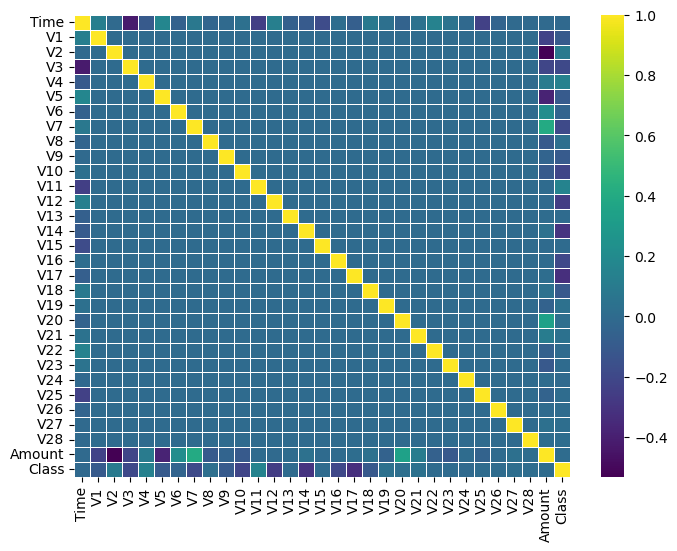

In [25]:
corr_matrix = df1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap = 'viridis', linewidths = 0.5)

plt.show()

In [26]:
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, \
precision_score, average_precision_score, roc_auc_score, recall_score, precision_recall_curve

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, IsolationForest

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from hyperopt import hp, tpe, STATUS_OK, fmin, Trials

In [27]:
X = df.iloc[:, 1:30]
y = df.iloc[:, 30:31]
X.head(), y.head()

(         V1        V2        V3        V4        V5        V6        V7  \
 0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9       V10  ...       V20       V21       V22       V23  \
 0  0.098698  0.363787  0.090794  ...  0.251412 -0.018307  0.277838 -0.110474   
 1  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775 -0.638672  0.101288   
 2  0.247676 -1.514654  0.207643  ...  0.524980  0.247998  0.771679  0.909412   
 3  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300  0.005274 -0.190321   
 4 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431  0.798278 -0.137458   
 
         V24       V25       V26       V27       V28  

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [30]:
# checking the shape

X_train.shape

(213605, 29)

In [31]:
X_test.shape

(71202, 29)

#### Training and evaluating the model on imbalanced data

In [32]:
def train_model(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple classifiers on the given training and test datasets.

    This function takes training and test feature sets and labels, trains three different classifiers
    (Logistic Regression, Decision Tree Classifier, and RandomForestClassifier) on the training data, 
    and evaluates their performance on the test data. For each classifier, it prints the confusion matrix, 
    classification report, ROC-AUC score, and plots the ROC curve.

    Parameters:
    X_train (pd.DataFrame or np.ndarray): Features of the training data.
    X_test (pd.DataFrame or np.ndarray): Features of the test data.
    y_train (pd.Series or np.ndarray): Labels of the training data.
    y_test (pd.Series or np.ndarray): Labels of the test data.

    Returns:
    None: This function does not return any values but prints evaluation metrics and plots.

    Notes:
    - The function assumes that the test data includes both positive and negative class samples.
    - ROC-AUC scores and ROC curves are only meaningful if the classifier provides probability estimates 
      for the positive class.
    - This function will display the ROC curves in separate plots for each classifier.
    """
    
    classifier = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree Classifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(random_state = 42) 
    }
    
    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)
        
        # making predictions
        y_pred = model.predict(X_test)
        
        # confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix: \n{conf_matrix}\n")
        
        # accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")
        
        # classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")
        
        # roc-auc score
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC-AUC Score (Imbalanced Data): {roc_auc}\n")
        
        # plotting ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve (Imbalanced Data)\nusing {name}', fontsize=10)
        plt.legend(loc='best')
        plt.show()
        print("\n")


================ Logistic Regression ================



/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 
[[71074    15]
 [   46    67]]


Accuracy: 0.9991432824920649


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.82      0.59      0.69       113

    accuracy                           1.00     71202
   macro avg       0.91      0.80      0.84     71202
weighted avg       1.00      1.00      1.00     71202


ROC-AUC Score (Imbalanced Data): 0.796354675436761



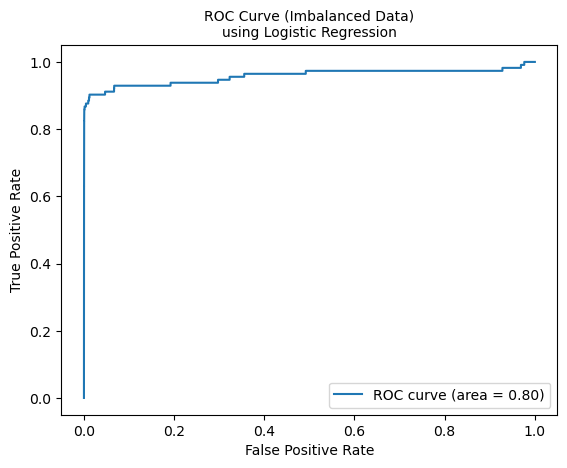




================ Decision Tree Classifier ================

Confusion Matrix: 
[[71057    32]
 [   27    86]]


Accuracy: 0.9991713715906857


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.73      0.76      0.74       113

    accuracy                           1.00     71202
   macro avg       0.86      0.88      0.87     71202
weighted avg       1.00      1.00      1.00     71202


ROC-AUC Score (Imbalanced Data): 0.8803059034686297



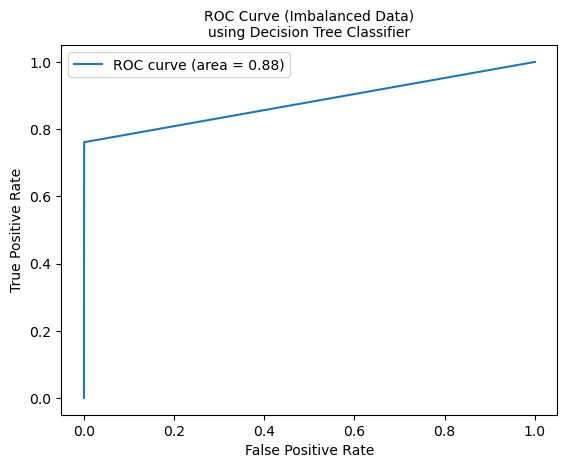




================ RandomForestClassifier ================



/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusion Matrix: 
[[71081     8]
 [   24    89]]


Accuracy: 0.9995505744220669


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.92      0.79      0.85       113

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202


ROC-AUC Score (Imbalanced Data): 0.8937490422388389



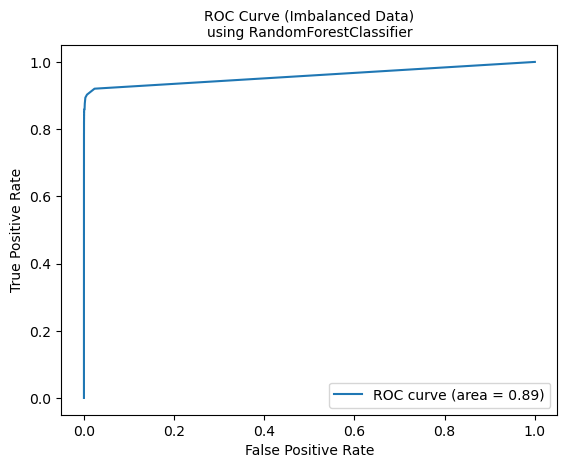

In [39]:
# calling the train_model function

train_model(X_train, X_test, y_train, y_test)

#### Handling Imbalanced Data

Two Techniques:
- Undersampling
- Oversampling

#### Undersampling

In [40]:
# separating normal and fraud transactions

normal = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# printing shape for reference

print(f"Normal transactions shape: {normal.shape}")
print(f"Fraud transactions shape: {fraud.shape}")

Normal transactions shape: (284315, 31)
Fraud transactions shape: (492, 31)


In [41]:
# Undersampling normal transactions

normal_sample = normal.sample(n = fraud.shape[0])

In [42]:
# printing the shape of the new normal transactions
normal_sample.shape

(492, 31)

In [43]:
# concating updated normal transactions with old fraud transactions and make a new df

new_df = pd.concat([normal_sample, fraud], ignore_index = True)

In [44]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,149345.0,-0.661643,0.281037,1.018178,-0.804833,1.389964,-0.794256,0.917846,-0.247378,-0.506387,...,-0.208168,-0.578195,-0.141386,-0.332126,-0.119722,0.177256,-0.147208,-0.112283,1.98,0
1,77268.0,1.183439,-0.502982,0.752337,-0.961821,-0.862592,0.142627,-0.803964,0.310027,1.677807,...,0.038004,0.328055,-0.051471,-0.301822,0.419332,-0.651822,0.101682,0.016996,1.00,0
2,150522.0,-0.743957,0.380206,1.288908,-0.744258,0.722166,-0.337966,0.343916,-0.039635,0.364536,...,-0.139659,-0.313190,-0.175115,-0.722034,-0.344815,-0.620374,0.084858,0.157216,18.93,0
3,64468.0,1.100390,0.913562,-0.131077,3.051313,0.394822,-0.092167,0.023967,0.098450,-0.343247,...,-0.195011,-0.289544,-0.091371,-0.117883,0.564197,0.107692,0.059026,0.074707,1.00,0
4,155174.0,-4.713262,-1.099221,-1.061008,-0.886181,-2.945060,-0.424838,-1.366765,1.975541,-0.493441,...,0.046563,-0.129974,-0.331382,0.063461,-0.141377,-0.389295,-0.154887,-0.676198,124.97,0


In [45]:
# checking new class distribution

new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [46]:
# Splitting the new dataframe into X and y

X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [47]:
# training the test split on undersampled data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


================ Logistic Regression ================

Confusion Matrix: 
[[96  3]
 [ 9 89]]


Accuracy: 0.9390862944162437


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197


ROC-AUC Score (Imbalanced Data): 0.9389301175015461



/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


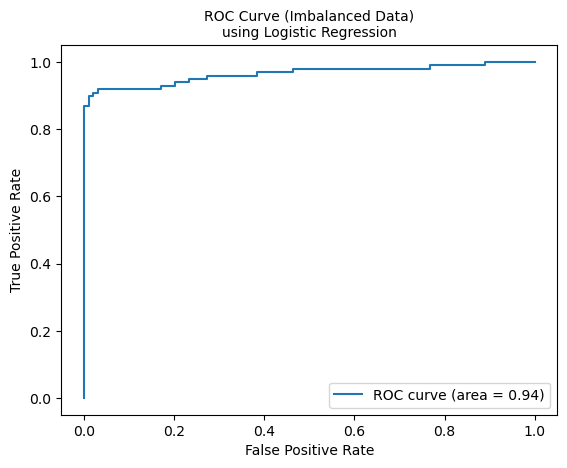




================ Decision Tree Classifier ================

Confusion Matrix: 
[[93  6]
 [ 9 89]]


Accuracy: 0.9238578680203046


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        99
           1       0.94      0.91      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197


ROC-AUC Score (Imbalanced Data): 0.923778602350031



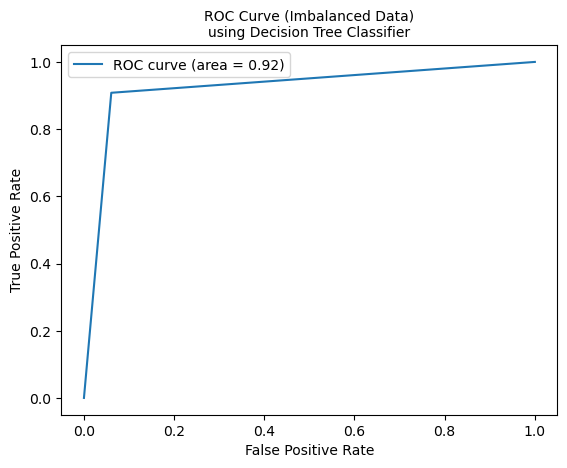




================ RandomForestClassifier ================

Confusion Matrix: 
[[99  0]
 [10 88]]


Accuracy: 0.949238578680203


Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.90      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


ROC-AUC Score (Imbalanced Data): 0.9489795918367347



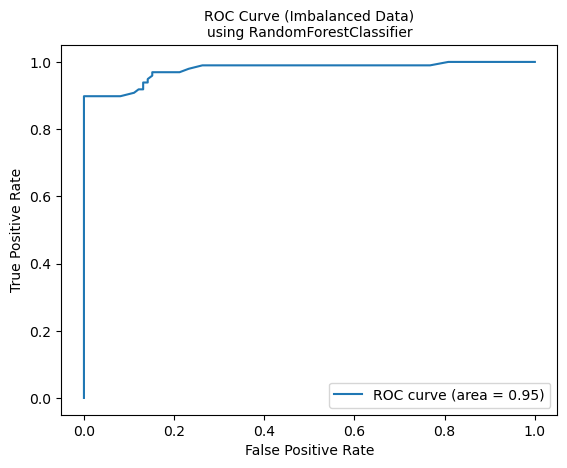

In [48]:
# training models with undersampled data

train_model(X_train, X_test, y_train, y_test)

#### Oversampling

I'll use SMOTE to balance the dataset by oversampling the minority class

In [49]:
# Split features and target

X = df.drop('Class', axis = 1)
y = df['Class']

In [52]:
# Applying SMOTE for oversampling

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
y_resampled.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)


================ Logistic Regression ================



/Users/simarmalhan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix: 
[[55736  1014]
 [ 1954 55022]]


Accuracy: 0.9739021859557181


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     56750
           1       0.98      0.97      0.97     56976

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726


ROC-AUC Score (Imbalanced Data): 0.9739185083881057



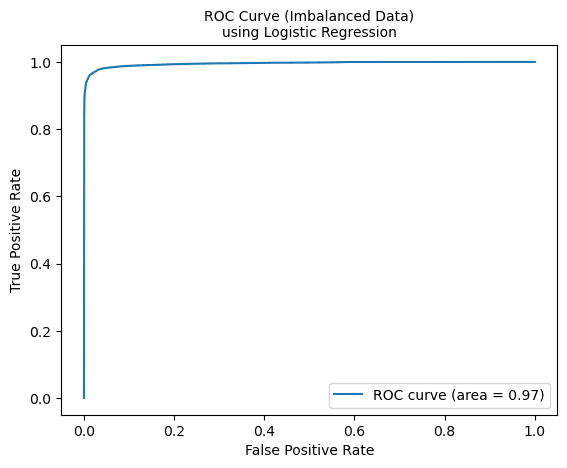




================ Decision Tree Classifier ================

Confusion Matrix: 
[[56610   140]
 [   33 56943]]


Accuracy: 0.998478799922621


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC-AUC Score (Imbalanced Data): 0.9984769242045805



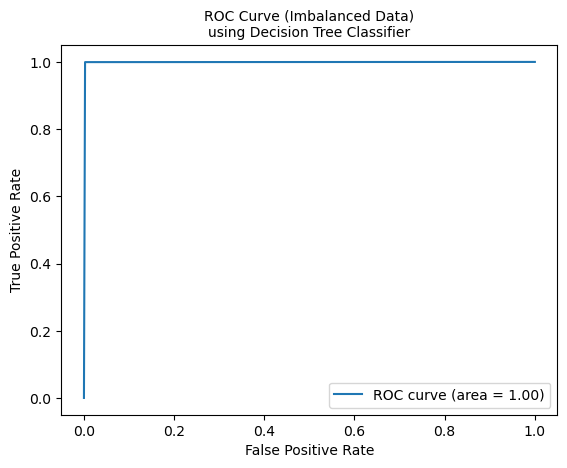




================ RandomForestClassifier ================

Confusion Matrix: 
[[56739    11]
 [    0 56976]]


Accuracy: 0.999903276295658


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


ROC-AUC Score (Imbalanced Data): 0.9999030837004405



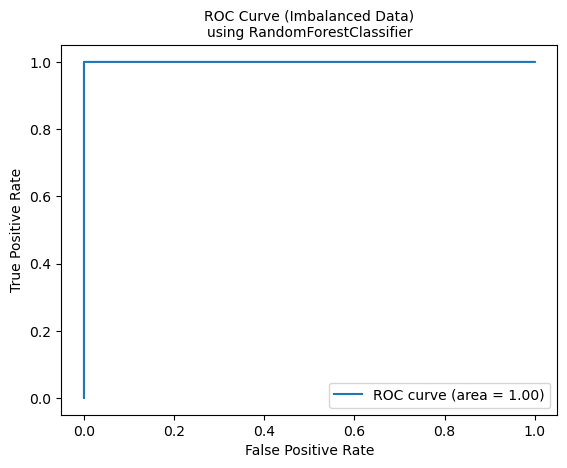

In [55]:
# training the model with oversampled data

train_model(X_train, X_test, y_train, y_test)

### Conclusion

### Credit Card Fraud Detection Analysis

In this analysis, we performed a comprehensive exploration and modeling process for credit card fraud detection using an imbalanced dataset. The steps included:

### 1. Data Exploration and Preprocessing
We began by loading and exploring the dataset, visualizing class imbalance, and performing necessary preprocessing steps.

### 2. Correlation Analysis
By investigating the correlations between features, we gained insights into how features interact with each other. This helped in identifying potential redundancies and understanding feature relationships.

### 3. Handling Imbalanced Data
We applied techniques such as undersampling and oversampling to address the class imbalance. This was crucial in ensuring that our models could better learn from the minority class.

### 4. Model Training and Evaluation
We trained and evaluated various classifiers, including:
- **Logistic Regression**
- **Decision Tree**
- **RandomForest**

We assessed model performance using metrics such as:
- Confusion matrices
- Classification reports
- ROC-AUC scores
- ROC curves

---

### Key Findings:

### Feature Correlations
Our correlation analysis revealed important relationships between features. This understanding can guide feature selection and engineering in future analyses.

### Model Performance
The **RandomForestClassifier** demonstrated high accuracy in detecting fraud, showing that it is a strong candidate for deployment. The **ROC-AUC scores** and **ROC curves** provided insights into each model’s performance, particularly in distinguishing between fraudulent and non-fraudulent transactions.

### Impact of Imbalance Handling
Techniques for balancing the dataset were essential in improving model performance and ensuring that the minority class (fraudulent transactions) was adequately represented in the training process.